In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Classification

In previous lectures we looked at the way we can use distributions to describe data, as well as for identifying inherent clustering/organisation within the properties of the data available. We can think of this approach as the <b>unsupervised classification</b>
of data. If, however, we have labels for some of these data points (e.g., an object is tall, short, red, or blue) we can utilize this information to develop a relationship between the label and the properties of a source. We refer to this as <b>supervised classification</b>.

The motivation for supervised classification comes from the long history of classification in astronomy. Possibly the most well known of these classification schemes is that defined by Edwin Hubble for the morphological classification of galaxies based on their visual appearance. This simple classification scheme, subdividing the types of galaxies into seven categorical subclasses, was broadly adopted throughout extragalactic astronomy. Why such a simple classification became so predominant when subsequent works on the taxonomy of galaxy morphology (often with a better physical or mathematical grounding) did not, argues for the need to keep the models for classification simple. This agrees with the findings of George Miller who, in 1956, proposed that the number of items that people are capable of retaining within their short term memory was 7±2!

## Assigning Categories
Supervised classification takes a set of features and relates them to predefined sets of classes. We will not address how we define the labels or taxonomy for the classification other than noting that the time-honored system of having a graduate student label data does not scale to the size of today’s data. We start by assuming that we have a set of predetermined labels that have been assigned to a subset of the data we are considering. Our goal is to characterize the relation between the features in the data and their classes (<b>machine learning</b>) and apply these classifications to a larger set of unlabeled data (<b>inference</b>).

As we go we will illuminate the connections between classification, regression, and density estimation. Classification can be posed in terms of density estimation - this is called <b>generative classification</b> (so-called since we will have a full model of the density for each class, which is the same as saying we have a model which describes how data could be generated from each class). This will be our starting point, where we will visit a number of methods. Among the advantages of this approach is a high degree of interpretability.

Starting from the same principles we will go to classification methods that focus on finding the decision boundary that separates classes directly, avoiding the step of modeling each class’s density, called discriminative classification, which can often be better in high-dimensional problems.

## Classification Loss
Perhaps the most common loss (cost) function in classification is zero-one loss, where we assign a value of one for misclassification and zero for a correct classification. One particularly common case of classification in astronomy is that of “detec- tion,” where we wish to assign objects (i.e., regions of the sky or groups of pixels on a CCD) into one of two classes: a detection (usually with label 1) and a nondetection (usually with label 0). When thinking about this sort of problem, we may wish to distinguish between the two possible kinds of error: assigning a label 1 to an object whose true class is 0 (a “false positive”), and assigning the label 0 to an object whose true class is 1 (a “false negative”).

Based on loss metrics such as the above, we can define two measures which will help us to determine how well our classifiers work. The first measure is <b>completeness</b>:
\begin{equation}
\text{completeness} = \frac{\text{true positives}}{\text{true positives}+\text{false negatives}}
\end{equation}

The second measure is <b>contamination</b>:
\begin{equation}
\text{contamination} = \frac{\text{false positives}}{\text{true positives}+\text{false negatives}}
\end{equation}

The completeness measures the fraction of total detections identified by our classifier, while the contamination measures the fraction of detected objects which are misclassified. Depending on the nature of the problem and the goal of the classification, we may wish to optimize one or the other.

Alternative names for these measures abound: in some fields the completeness and contamination are respectively referred to as the "sensitivity" and the "Type I error". In astronomy, one minus the contamination is often referred to as the "efficiency". In machine learning communities, the efficiency and completeness are respectively referred to as the "precision" and "recall".

# Naive Bayes Classification
Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very <b>high-dimensional</b> datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L|\text{features})$. Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

\begin{equation}
P(L|\text{features}) = \frac{P(\text{features}|L)P(L)}{P(\text{features})}
\end{equation}

If we are trying to decide between two labels - let's call them L1
 and L2 - then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

\begin{equation}
\frac{P(L_1|\text{features})}{P(L_2|\text{features})} = \frac{P(\text{features}|L_1)}{P(\text{features}|L_2)} \frac{P(L_1)}{P(L_2)}
\end{equation}

All we need now is some model by which we can compute $P(\text{features}| L_i)$ for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

## Gaussian Naive Bayes
Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Imagine that you have the following data:

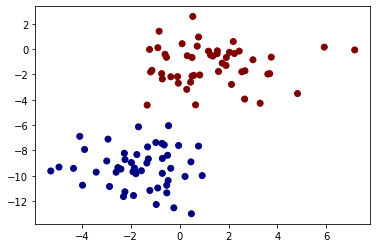

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.jet)
plt.show()

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. The result of this naive Gaussian assumption is shown in the following figure:

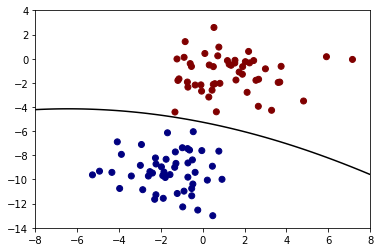

In [3]:
# Fit the Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-8, 8)
ylim = (-14, 4)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

#convert to 1-D arrays
oned_xx = xx.ravel()
oned_yy = yy.ravel()

# get probabilities of each x,y coordinate from the NB classifier
# i.e. returns the probability of the samples for each class in the model. 
Z = gnb.predict_proba(np.column_stack((oned_xx,oned_yy)))
Z = Z[:, 1].reshape(xx.shape)

# Plot the samples again
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.jet)

# Now plot the contour between the two classes at p=0.5
# i.e. for every coordinate in xx,yy, if z is at 0.5 
# (equal probability) of both classes, then draw the contour at that coordinate
ax.contour(xx, yy, Z, [0.5], colors='k')

plt.show()

The assumption has generated a multivariate (2-D) Gaussian for each class. Towards the denser center of each class, the probability is higher, and falls the further we vary from the center. This normal distribution is done for both classes, and there is a point (the black line) where a sample could be generated from any of the two classes with equal probability.

When we utilized the 'gnb.predict_proba()' method of the Gaussian Naive Bayes classifier, the returned columns give the posterior probabilities of the first and second label, respectively. Since we measured a probability over an entire grid of possible samples, we have a map of probabilities for each class, at each point in the image. This information was used to draw the black contour delineating the point at which there is equal probabilitiy for each class to generate a sample along the contour.

### Gaussian Naive Bayes for Star/LL-Rylae Classification
The Gaussian Naive Bayes classification we have considered so far was performed on a simple, well-separated data set. Examples like this one make classification straightforward, but data in the real world is rarely so clean. Instead, the distributions often overlap, and categories have hugely imbalanced numbers. To demonstrate this, we shall be applying Gaussian Naive Bayes classification to the RR Lyrae data set.

This data set is a set of photmetric observations of RR Lyrae stars in the Sloan Digital Sky Survey (SDSS). The particular dataset in question comes from SDSS Stripe 82, and combines the Stripe 82 standard stars, which represent observations of nonvariable stars; and the RR Lyrae variables, pulled from the same observations as the standard stars, and selected based on their variability using supplemental data. The sample is further constrained to a smaller region of the overall color–color space following (0.7 < u−g < 1.35, −0.15 < g−r < 0.4,−0.15 < r−i < 0.22, and −0.21 < i−z < 0.25).These selection criteria lead to a sample of 92,658 nonvariable stars, and 483 RR Lyraes. Two features of this combined data set make it a good candidate for testing classification algorithms:

1. The RR Lyrae stars and main sequence stars occupy a very similar region in u,g,r,i,z color space. The distributions overlap slightly, which makes the choice of decision boundaries subject to the completeness and contamination trade-off discussed earlier.
2. The extreme imbalance between the number of sources and the number of background objects is typical of real-world astronomical studies, where it is often desirable to select rare events out of a large background. Such unbalanced data aptly illustrates the strengths and weaknesses of various classification methods.

Let us have a look at the dataset in question:

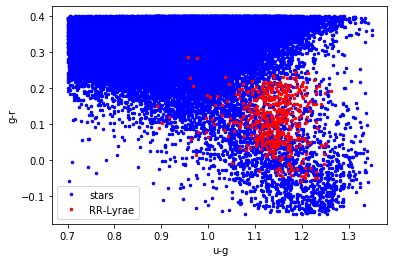

In [4]:
# Load up RRLyrae Dataset
data = np.load('./data/rrlyrae.npz')
samples = data['data']
labels = data['labels']

# stars are indicated by 0 labels, and rrlyrae by 1 labels
stars = (labels == 0)
rrlyrae = (labels == 1)

# plot the results
ax = plt.axes()
ax.plot(samples[stars, 0], samples[stars, 1], '.', ms=5, c='b', label='stars')
ax.plot(samples[rrlyrae, 0], samples[rrlyrae, 1], '.', ms=5, c='r', label='RR-Lyrae')

ax.legend(loc=3)
ax.set_xlabel('u-g')
ax.set_ylabel('g-r')

plt.show()

In the figure above, the blue samples show non-variable sources, while the red points show variable sources. We are only plotting two features for each sample, i.e. u-g vs. g-r. There are of course 4 features for the dataset. Let us try out Gaussian Naive Bayes classification to this highly overlapping dataset:

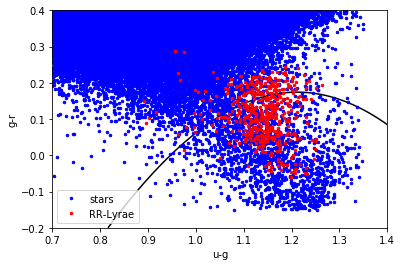

In [5]:
# Fit the Naive Bayes classifier to the first 2 dimensions
samples_2d = samples[:,0:2]
gnb = GaussianNB()
gnb.fit(samples_2d, labels)

# predict the classification probabilities on a grid
xlim = (0.7, 1.4)
ylim = (-0.2, 0.4)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

#convert to 1-D arrays
oned_xx = xx.ravel()
oned_yy = yy.ravel()

# get probabilities of each x,y coordinate from the NB classifier
# i.e. returns the probability of the samples for each class in the model. 
Z = gnb.predict_proba(np.column_stack((oned_xx,oned_yy)))
Z = Z[:, 1].reshape(xx.shape)

# Plot the samples again
ax = plt.axes()
ax.plot(samples[stars, 0], samples[stars, 1], '.', ms=5, c='b', label='stars')
ax.plot(samples[rrlyrae, 0], samples[rrlyrae, 1], '.', ms=5, c='r', label='RR-Lyrae')

ax.legend(loc=3)
ax.set_xlabel('u-g')
ax.set_ylabel('g-r')

# Now plot the contour between the two classes at p=0.5
# i.e. for every coordinate in xx,yy, if z is at 0.5 
# (equal probability) of both classes, then draw the contour at that coordinate
ax.contour(xx, yy, Z, [0.5], colors='k')

plt.show()

The classification boundary is unable to separate regions of high overlap between the two categories, but it gives the best possible separation based on the generative model employed - a multivariate Gaussian distribution.

We can now look at the predictions (classifications) of the data that was used to train the model, and analyze it via the criteria of completeness and contamination. For this purpose, we will retrain the model to employ multivariate Gaussians covering all dimensions in the dataset:

In [6]:
# Fit the Naive Bayes classifier to all original dimensions
gnb = GaussianNB()
gnb.fit(samples, labels)

# now predict
labels_pred = gnb.predict(samples)

# get metrics to calculate scores
tn, fp, fn, tp = confusion_matrix(labels, labels_pred).ravel()

#get completeness score
completeness_score = tp/(tp+fn)
print(completeness_score)

#get contamination score
contamination_score = fp/(tp+fp)
print(contamination_score)

0.8571428571428571
0.8230012825994014


In order to calculate the completeness and contamination scores, we made use of a confusion matrix. A confusion matrix is a table showing the disparity between actual labels and predicted labels, for every class in the problem - in this case we had two classes. The confusion matrix for our classifier looks like so:

In [7]:
print(confusion_matrix(labels, labels_pred))

[[90733  1925]
 [   69   414]]


In the ideal case for a perfect classifier, you want the leading diagonal of this matrix to contain all the samples, and 0 values on the off-diagonals. In our case, 90733 samples which should have been classified as class 0, were classified correctly, whilst 1925 samples which should have been classified as class 0 were classified incorrectly (as class 1).

Similarly, 414 samples which should have been classified as class 1 were classified correctly, whilst 69 samples which should have been classified as class 1 were classified incorrectly (as class 0).

For two-class, or binary classification, these 4 values translate directly to true positive, false positive, false negative, true positive values. A little more work would be required if we had more classes.

### Gaussian Naive Bayes Recap
This section introduced the concept of Naive Bayes classification, based on Gaussian models. Of course, any model that provides predictions for a sample can be used in this framework - it need not be Gaussian. We have also introduced and demonstrated a number of classification concepts which will be useful for other classification methods.

As a rule of thumb, when should you be inclined to use Naive Bayes classification? Keep in mind that you are making stringent assumptions about the data based on the particular model of choice. That being said, Naive Bayes classifiers have a number of advantages:
* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often very easy to interpret
* They have very few (if any) parameters that need tuning

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:
* When the naive assumptions actually match the data (very rare in practice)
* For very well-separated categories, when model complexity is less important
* For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.